In [9]:
# Install a pip package in the current Jupyter kernel
import sys
# !{sys.executable} -m pip install lightkurve

In [1]:
import lightkurve as lk

# Kepler 10

/home/ubuntu/anaconda3/lib/python3.8/site-packages/lightkurve/search.py:228: LightkurveWarning: Warning: 16 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn('Warning: {} files available to download. '


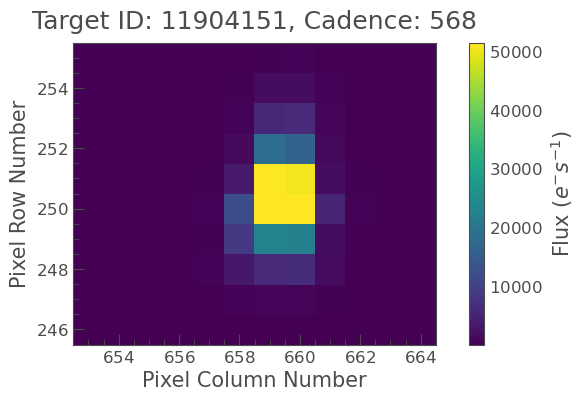

In [17]:
pixels = lk.search_targetpixelfile("KIC 11904151").download()
pixels.plot()

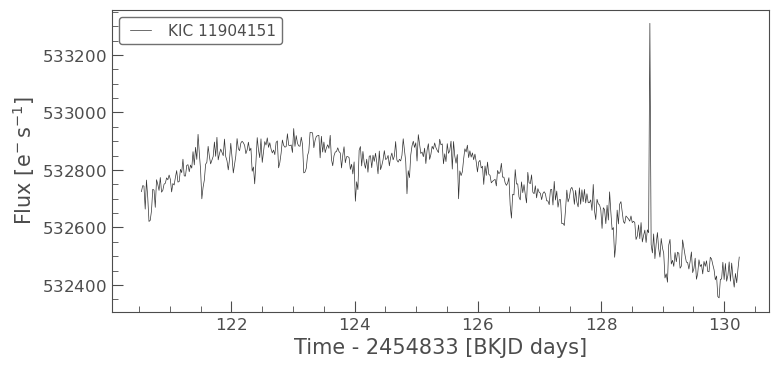

In [18]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

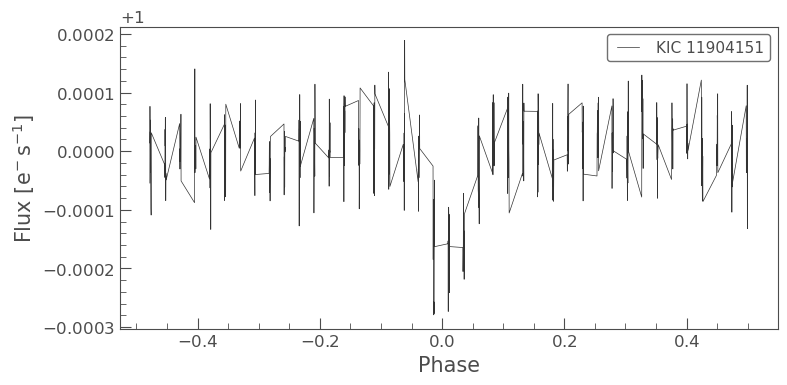

In [19]:
exoplanet = lightcurve.flatten().remove_outliers().fold(period=0.838)
exoplanet.plot()

# TESS

/Users/deanwang/anaconda3/envs/triceratops/lib/python3.8/site-packages/lightkurve/utils.py:459: MatplotlibDeprecationWarning: The 'norm' parameter to Colorbar has no effect because it is overridden by the mappable; it is deprecated since 3.3 and will be removed two minor releases later.
  cbar = plt.colorbar(cax, ax=ax, norm=norm, label=clabel)


<AxesSubplot:title={'center':'Target ID: 441183643, Cadence: 70445'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

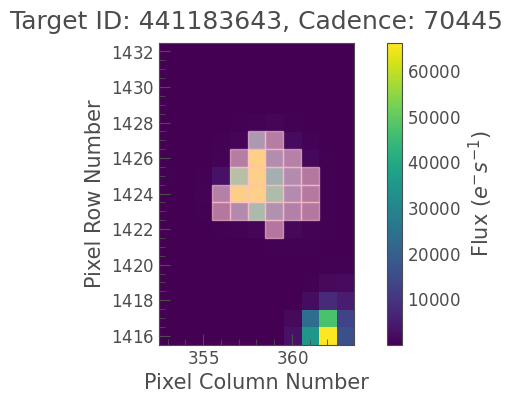

In [78]:
pixels = lk.search_targetpixelfile(target="TIC 441183643", mission="TESS").download()
pixels.plot(aperture_mask=pixels.pipeline_mask)

In [79]:
print("sector: " + str(pixels.sector))
print("row: " + str(pixels.row))
print("column: " + str(pixels.column))
print("aperture: " + str(pixels.pipeline_mask))

sector: 1
row: 1416
column: 353
aperture: [[False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False False]
 [False False False False False False  True False False False False]
 [False False False  True  True  True  True  True  True False False]
 [False False False  True  True  True  True  True  True False False]
 [False False False False  True  True  True  True  True False False]
 [False False False False  True  True  True  True False False False]
 [False False False False False  True  True False False False False]
 [False False False False False False False False False False False]
 [False False False False False False False False False False

In [80]:
aperture_list = []
current_row = pixels.row
for row in pixels.pipeline_mask:
    current_column = pixels.column
    for cell in row:
        if cell == True:
            aperture_list.append([current_row, current_column])
        current_column = current_column + 1
    current_row = current_row + 1
print(aperture_list)

[[1422, 359], [1423, 356], [1423, 357], [1423, 358], [1423, 359], [1423, 360], [1423, 361], [1424, 356], [1424, 357], [1424, 358], [1424, 359], [1424, 360], [1424, 361], [1425, 357], [1425, 358], [1425, 359], [1425, 360], [1425, 361], [1426, 357], [1426, 358], [1426, 359], [1426, 360], [1427, 358], [1427, 359]]


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

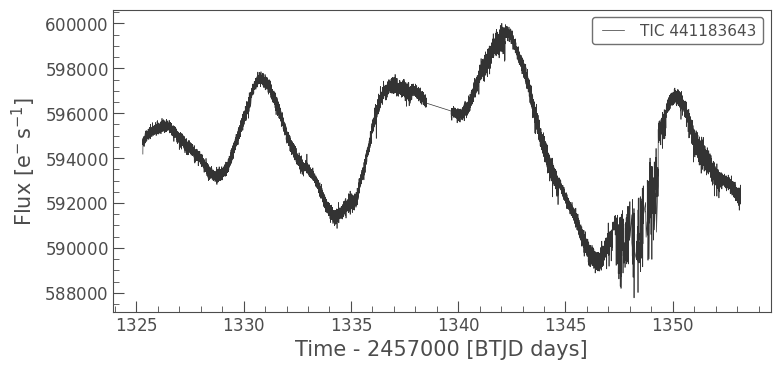

In [81]:
lightcurve = pixels.to_lightcurve()
lightcurve.plot()

<AxesSubplot:xlabel='Phase', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

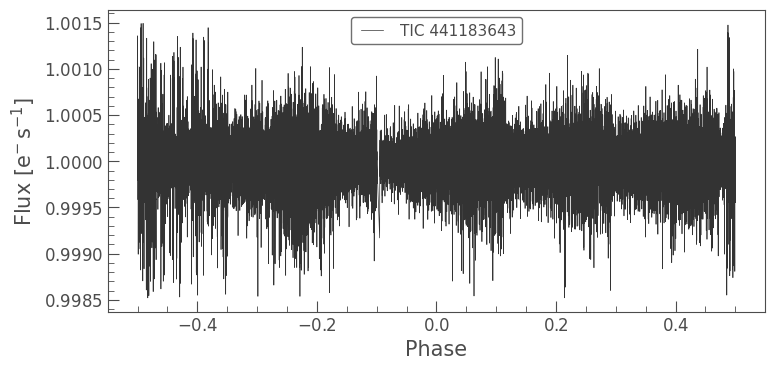

In [82]:
exoplanet = lightcurve.flatten().remove_outliers().fold(period=13.9645)
exoplanet.plot()